In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

In [4]:
#Getting Annual Temperature Data
with open('carbon.txt') as f:
    tempdata = [i[:-1] for i in f.readlines()]

tempyears = []
tempmean = []    

for i in range(58):
    tempdata.pop(0) #removing first 58 lines of text file

for line in tempdata:
    j = line.split()
    tempyears.append(float(j[0])) #years are integers
    tempmean.append(float(j[3])) #temperature is a float

data = {'Year':tempyears, 'Annual Mean':tempmean}
global_temp = pd.DataFrame(data)
global_temp.to_csv('carbon.csv')

In [5]:
global_temp.head()

,Year,Annual Mean
0,1958.0,315.70
1,1958.0,317.45
2,1958.0,317.51
3,1958.0,317.24
4,1958.0,315.86


In [6]:
x = global_temp['Year'].values.reshape(-1, 1)
y = global_temp['Annual Mean'].values.reshape(-1,1)

C:\Users\kenic\AppData\Local\Temp\ipykernel_25056\3883637479.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


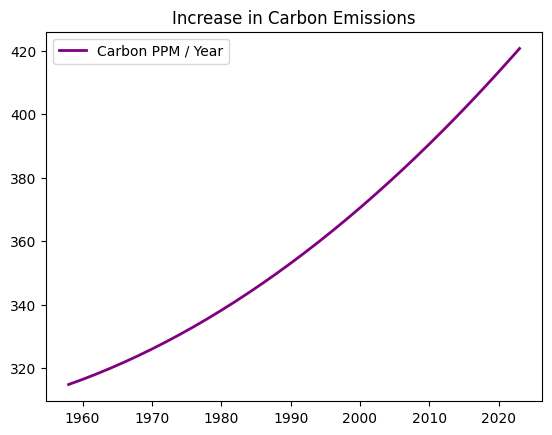

In [22]:
# process x to polynomial features
poly_feat = PolynomialFeatures(degree=2)
x_poly = poly_feat.fit_transform(x)

# fit polynomial regression
reg = LinearRegression(fit_intercept=False)
reg.fit(x_poly, y)

# predict y (from regression)
y_pred = reg.predict(x_poly)

# plot
plt.plot(x, y_pred, linewidth=2, color='purple', label='Carbon PPM / Year')
plt.title(f'Increase in Carbon Emissions')
plt.legend()
plt.ylabel=('ppm')
plt.xlabel=('Year')